# Task 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset=pd.read_csv('Iris.csv',index_col=0)

In [5]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


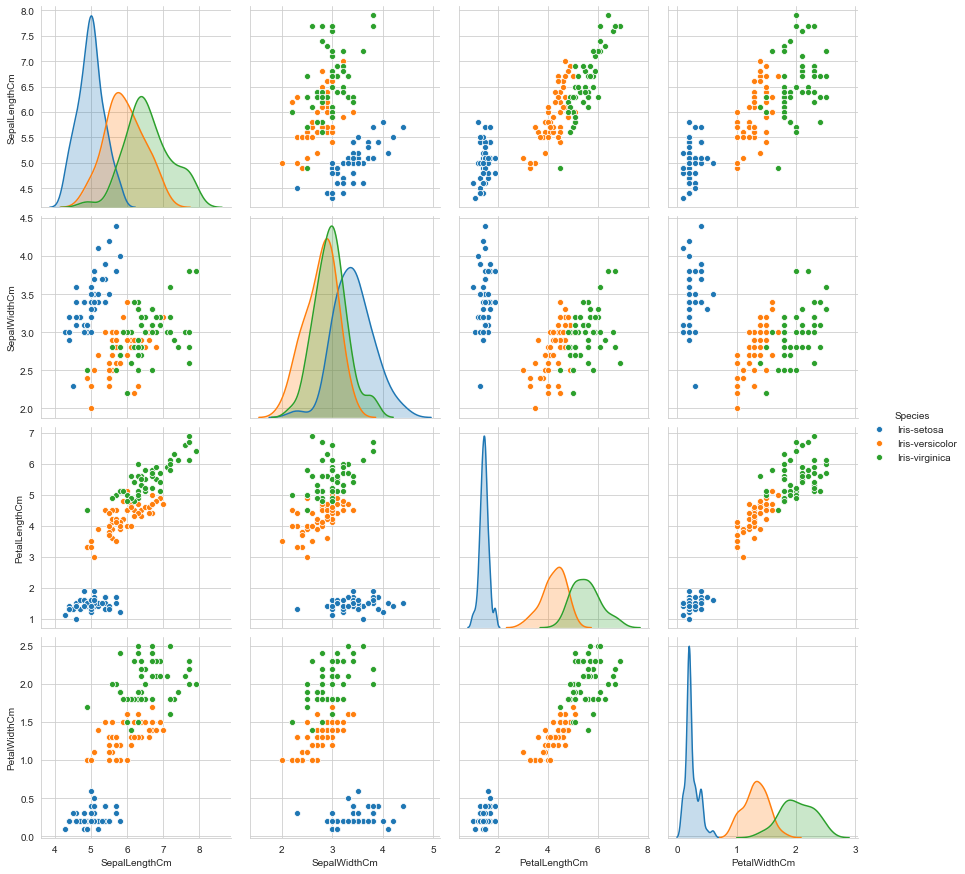

In [6]:
sns.pairplot(dataset,hue='Species',diag_kind='kde',height=3)

In [7]:
data=dataset.drop(['Species'],axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [8]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
wcss
    

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.332858416945356,
 30.031193052116976,
 27.839591136933254,
 26.046884370015956]

Text(8, 600, 'Centroid')

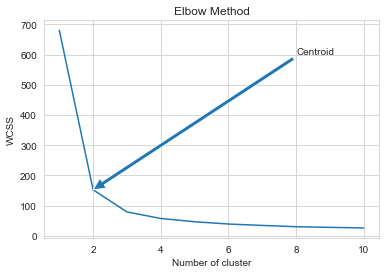

In [9]:
plt.plot([i for i in range(1,11)],wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.annotate('Centroid',xy=(2 , 152.36870647733915),xytext=(8,600),arrowprops={})

In [10]:
kmeans=KMeans(n_clusters=3)
pred=kmeans.fit_predict(data)


In [11]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

Text(0, 0.5, 'SepalWidthCm')

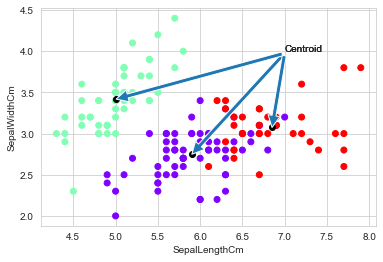

In [12]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],c=pred,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black')
plt.annotate('Centroid',xy=(5.9016129 , 2.7483871),xytext=(7.0,4.0),arrowprops={})
plt.annotate('Centroid',xy=(5.006     , 3.418 ),xytext=(7.0,4.0),arrowprops={})
plt.annotate('Centroid',xy=(6.85      , 3.07368421),xytext=(7.0,4.0),arrowprops={})
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')